## **Exploratory Data Analysis using the Titanic Data Set**
- This is a guide through a comprehensive EDA of the Titanic dataset step by step. 
- Let's begin with the initial data exploration.

## **🛠 Tools and Libraries for EDA**  

To perform EDA efficiently, you’ll use several Python libraries:  
- **pandas**: For data manipulation and inspection.  
- **numpy**: For numerical computations.  
- **matplotlib**: For static visualizations (e.g., histograms, scatter plots).  
- **seaborn**: For statistical plots and heatmaps.  
- **missingno**: For visualizing missing data.  
- **plotly/altair**: For interactive visualizations.  

Here’s how to import the key libraries for EDA:  

---

## **📝 Common EDA Tasks**  

Here are the common steps you’ll perform during EDA:  

1. **Initial Data Inspection**:  
   - Check the size of the dataset using `.shape`.  
   - Preview the first few rows using `.head()`.  
   - Get column names, data types, and non-null counts using `.info()`.  

2. **Handle Missing Data**:  
   - Identify missing values using `.isnull().sum()`.  
   - Decide whether to **drop** or **fill** missing values.  

3. **Univariate Analysis**:  
   - Explore individual features to understand their distributions.  
   - Use histograms, KDE plots, and bar charts to visualize distributions.  

4. **Bivariate Analysis**:  
   - Analyze relationships between pairs of variables using scatter plots and boxplots.  

5. **Multivariate Analysis**:  
   - Study interactions between multiple features using pair plots and heatmaps.  

6. **Outlier Detection**:  
   - Identify outliers using boxplots, IQR, and Z-scores.  

7. **Target Variable Analysis**:  
   - Explore the distribution of the dependent (target) variable, such as `Survived` in Titanic.

---



In [1]:
# Importing Libraries
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt # for static plots
import seaborn as sns #for statistical plots

# Importing and loading dataset from kaggle
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
gender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv") 


## **📊 Step 1.Feature Profiling and Initial Data Exploration**
- **This section presents an overview and initial analysis of the dataset features, focusing on data types, missing values, duplicates, possible errors, and potential plots for each feature.**

---
## 🛠️ Key Pandas Functions for Initial Data Exploration


**df.head() :Displays the first few rows of the dataset**

**df.shape: Returns the number of rows and columns (dataset dimensions)**

**df.columns: Lists all column names (features)**

**df.info(): Shows column names, data types, and non-null counts**

**df.describe(): Provides summary statistics for numerical features**

**df.nunique(): Returns the number of unique values per column**

**df.isnull().sum(): Counts missing values per feature**

**df.duplicated(): Identifies duplicate rows (returns a Boolean Series)**

**df.duplicated().sum(): Returns the total number of duplicated rows**

**df.value_counts(): (Used on individual columns) Counts frequency of each unique value**

**df.dtypes: Lists data types of all columns**

## **📋 i. Dataset Overview**

In [2]:
# Displaying the first few rows of the dataset
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Displaying the number of rows and columns in the dataset
print(f'The Titanic Dataset has {train.shape[0]} rows and {train.shape[1]} Columns')
train.shape

The Titanic Dataset has 891 rows and 12 Columns


(891, 12)

## **🧠 ii. Data Types and Missing Values**

In [4]:
# Getting an overview of columns and their data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Checking columns with missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **iii. 📊 Summary statistics for numerical columns**
- We use the **.describe()** to return a statistical summary for the numerical columns

**.describe() returns**:
- **count**

Number of non-missing (non-null) values in each column.

- **mean**

The average (arithmetic mean) of the values in each numerical column.

- **std**

Standard deviation: measures how spread out the values are from the mean.

- **min**

The smallest value in each column.

- **25% (1st Quartile)**

The value below which 25% of the data fall.

- **50% (Median / 2nd Quartile)**

The middle value when data is sorted; 50% of the values lie below this point.

- **75% (3rd Quartile)**

The value below which 75% of the data fall.

- **max**

The largest value in each column.

---
## ✅ Use Cases of df.describe()
1. Get a quick statistical summary of all numeric columns.

2. Identify potential outliers using min/max vs. quartiles.

3. Understand data distribution, especially when combined with visual tools.

4. Detect missing data by comparing count to the total number of rows.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


## 🧾 iv. Viewing Column Names

To list all column names in the dataset, use **.columns**:
### **Why This Matters:**

- Helps you quickly scan the names of features.
- Useful if you need to rename columns or drop irrelevant columns or investigate any inconsistency.


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 🔍 v. Checking for Unique Values Per Column 
- We use **.nunique()** to return unique values for each column in the data frame

In [9]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## 🔍 vi. Checking for Duplicate Rows
- To check for duplicate rows in a dataset we use **.duplicated()**
- Returns a Boolean Series indicating whether each row is a duplicate of a previous row.
- Helps identify redundant rows in the dataset.

In [10]:
train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [11]:
train.duplicated().sum()

0

## 🧭Step 2: Univariate Analysis
- Univariate analysis focuses on analyzing each feature (column) independently to understand its distribution, range, and underlying patterns.
- It helps identify data issues like outliers, skewness, and the need for transformations.

---
## ✅ General Steps for Univariate Analysis
**1. Identify the feature type:**

- Numerical (e.g., Age, Fare)

- Categorical (e.g., Sex, Embarked)

**2. Use descriptive statistics:**

- For numerical: .describe(), histograms, boxplots

- For categorical: .value_counts(), bar plots

**3. Visualizing the distribution:**

- Helps uncover patterns, skewness, and outliers

**4. Interpret and document insights:**

- Note down any skewness, class imbalance, or anomalies



## ✨ 1.Finding the age Distribution of passengers

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


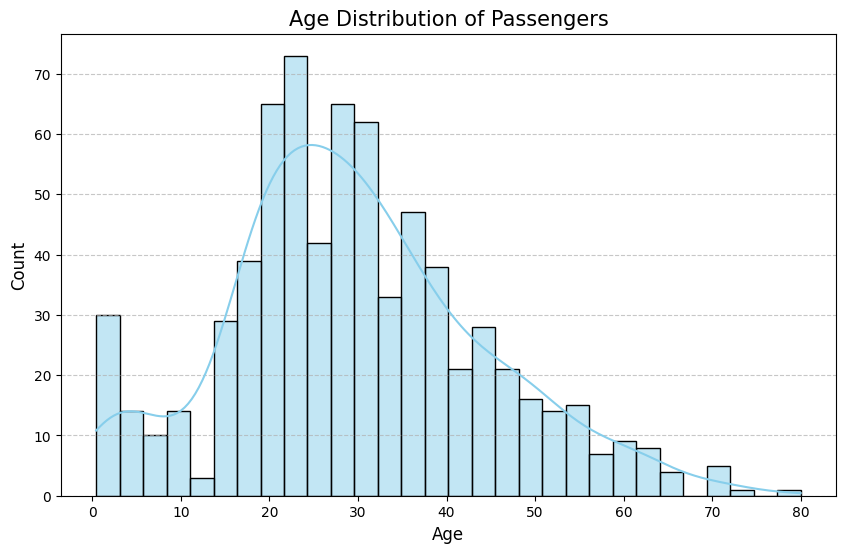

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
# Summary statistics
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## ✨ 2.Embarked Port Distribution
- We check how many passengers boarded from each port (S = Southampton, C = Cherbourg, Q = Queenstown).

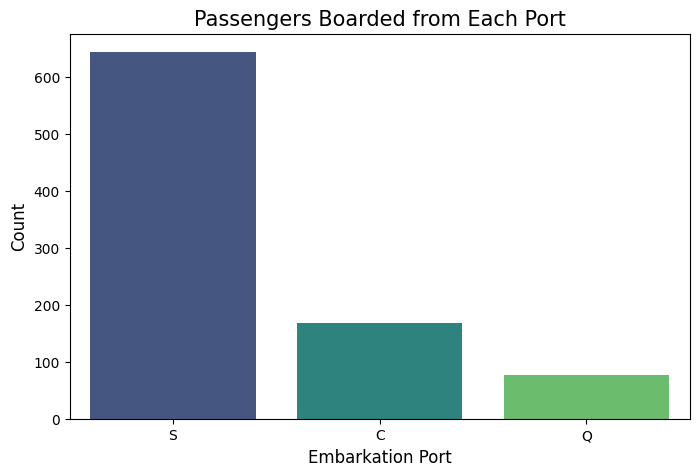

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=train, palette='viridis')
plt.title('Passengers Boarded from Each Port', fontsize=15)
plt.xlabel('Embarkation Port', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## 📝Observations:
- Southampton (S) was the most common port (~72% of passengers).
- Cherbourg (C) had fewer passengers (~19%), possibly wealthier (more 1st-class passengers).
- Queenstown (Q) had the fewest (~9%), likely lower-class travelers.



## ✨ 3.Fare Distribution (Ticket Prices)
- We analyze how ticket fares were distributed.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


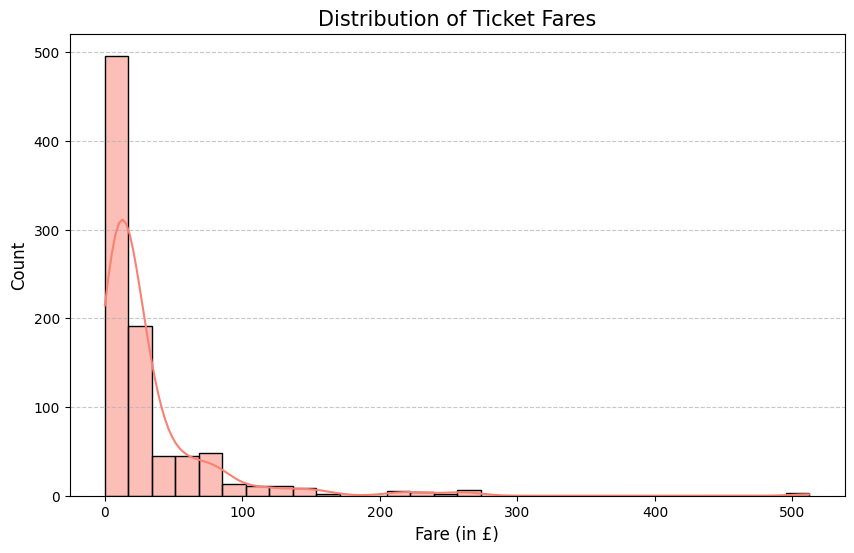

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Ticket Fares', fontsize=15)
plt.xlabel('Fare (in £)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 📝Observations:
- Extreme right skew: Most fares were under £50, but some were very expensive (>£500).
- Outliers exist: A few passengers paid exceptionally high fares (likely 1st-class suites).

## ✨ 4. Passenger Class (Pclass) Distribution

- We examine how many passengers were in each class (1st, 2nd, 3rd).

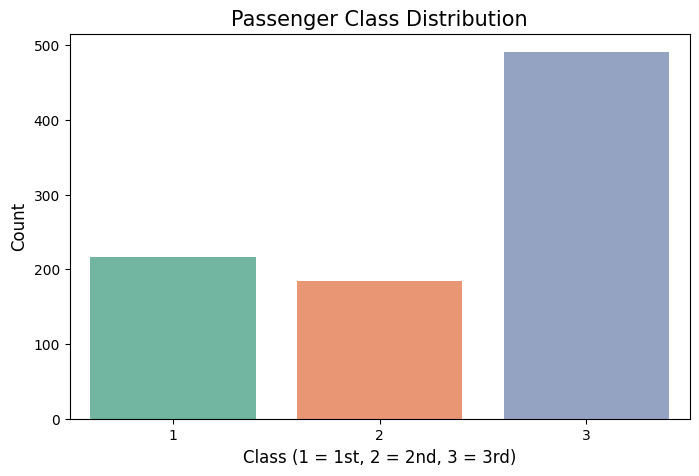

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=train, palette='Set2')
plt.title('Passenger Class Distribution', fontsize=15)
plt.xlabel('Class (1 = 1st, 2 = 2nd, 3 = 3rd)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## 📝Observations:
- Most passengers were in 3rd class (~55%).
- Fewest in 2nd class (~21%).
- 1st class had moderate numbers (~24%), indicating wealth disparity.

## ✨ 5. Gender Distribution
- We check the male-to-female ratio.

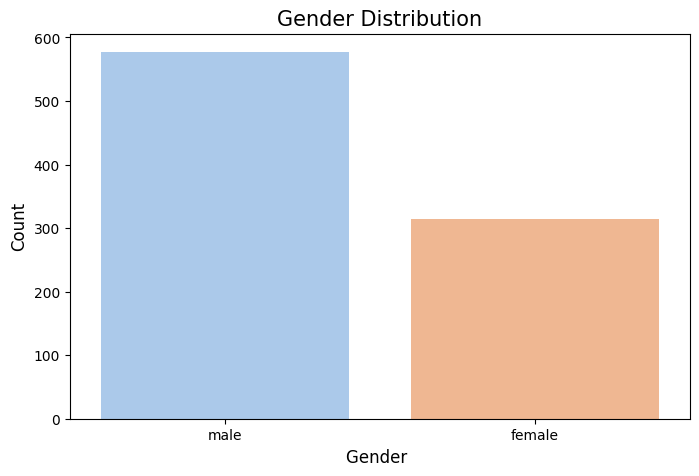

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=train, palette='pastel')
plt.title('Gender Distribution', fontsize=15)
plt.xlabel('Gender ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## 📝Observations:
- More males  than females

## ✨ 6. Survival Rate (Target Variable)
- We analyze how many passengers survived vs. died.

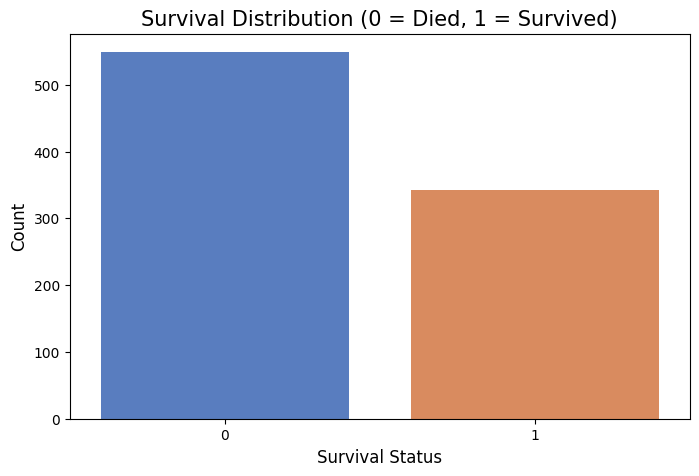

In [19]:
plt.figure(figsize = (8,5))
sns.countplot(x='Survived', data=train, palette='muted')
plt.title('Survival Distribution (0 = Died, 1 = Survived)', fontsize=15)
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## 📝Observations:
- Only ~38% survived, confirming the tragedy.
- Majority (62%) perished, mostly men and lower-class passengers.



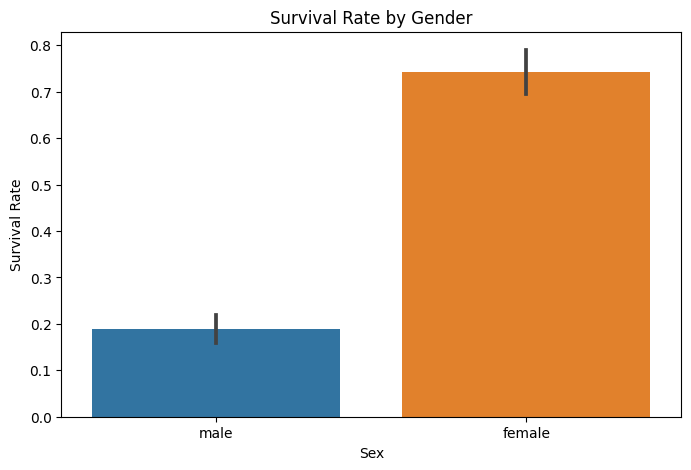

In [20]:
# 2. Survival by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data= train)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

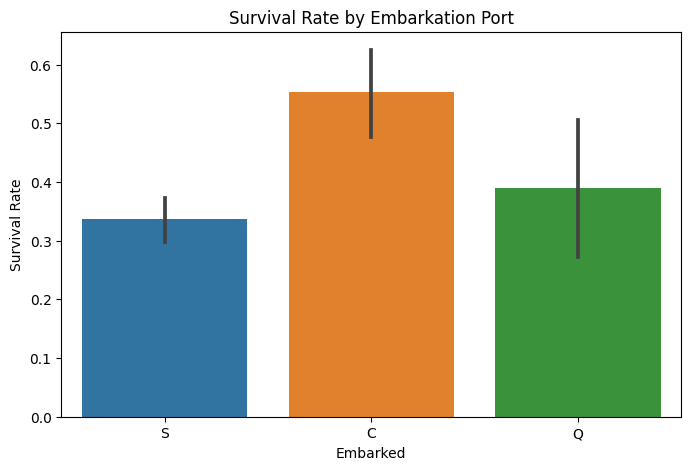

In [21]:
# 3. Survival by Embarked Port
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data= train)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

## 📝 Key Takeaways from Univariate Analysis
- Most passengers were young adults (20-40) in 3rd class.

- Southampton was the most common boarding point.

- Fares were highly skewed—most tickets were cheap, but a few were very expensive.

- Survival rate was low (~38%), with women and 1st-class passengers having better chances.

## 🧭Step 3: Bivariate Analysis
- **Bivariate analysis examines relationships between two variables to uncover patterns and dependencies**.
- Below, we analyze key feature pairs to answer important questions about the Titanic disaster.
---
## ✨ 1. Does Fare Change Depending on Pclass?



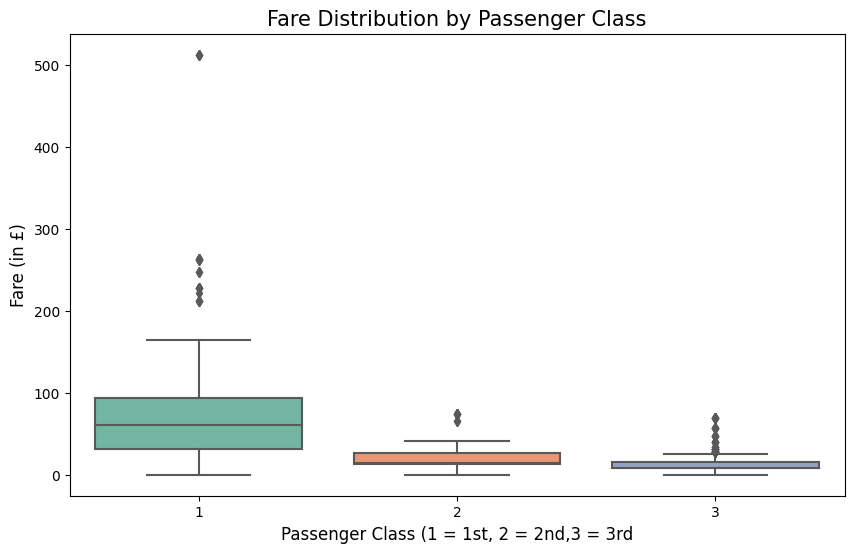

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Fare',data=train, palette='Set2')
plt.title('Fare Distribution by Passenger Class',fontsize=15)
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd,3 = 3rd',fontsize = 12)
plt.ylabel('Fare (in £)', fontsize = 12)
plt.show()

## 📝Observations:
- 1st class fares were significantly higher (median ~£60, some >£200).
- 2nd class fares clustered around £15-25.
- 3rd class fares were cheapest (mostly under £15).
- Outliers exist: Some 1st-class passengers paid extremely high fares (luxury suites).
## Fare Strongly depends on Pclass- wealthier passengers paid more for better accomodation

## ✨2. Are Younger Passengers More Likely to Survive?
- We analyze if age impacted survival chances.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


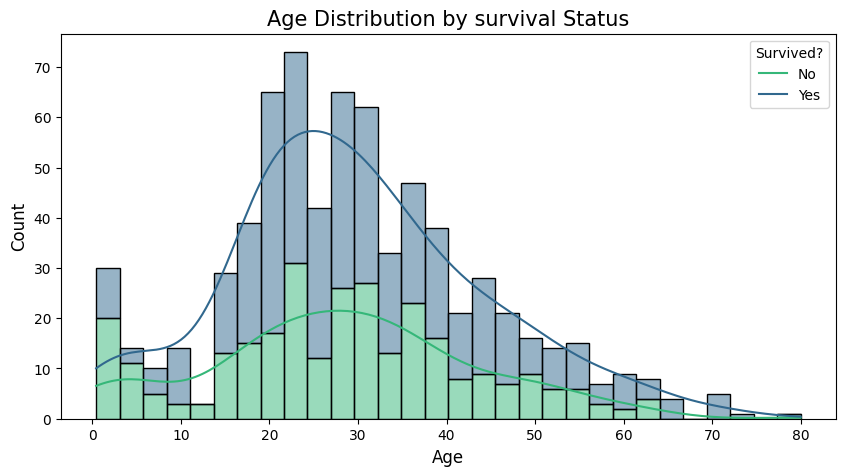

In [23]:
plt.figure(figsize = (10,5))
sns.histplot(data=train, x='Age',hue='Survived',bins=30,kde=True,multiple='stack',palette='viridis')
plt.title('Age Distribution by survival Status', fontsize = 15)
plt.xlabel('Age',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.legend(title='Survived?', labels=['No','Yes'])
plt.show()

## 📝Observations:
- Children (<10) had high survival rates 
- Peak deaths in 20-40 age group (many young adults perished).
- Elderly passengers (>60) had low survival rates.

## 📝Conclusion:
✔ Younger passengers (especially children) were prioritized, while adults aged 20-40 faced higher mortality.

## ✨ 3. Does Embarked Location Affect Survival Rate?

<ipython-input-24-85cc66c22372>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked',y='Survived', data= train,palette='mako',ci=None)


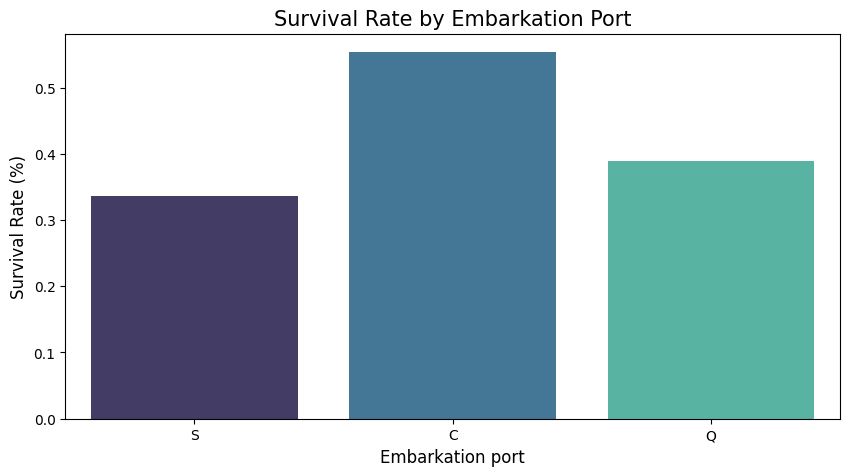

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='Embarked',y='Survived', data= train,palette='mako',ci=None)
plt.title('Survival Rate by Embarkation Port', fontsize = 15)
plt.xlabel('Embarkation port', fontsize = 12)
plt.ylabel('Survival Rate (%)', fontsize = 12)
plt.show()

## 📝Observations:
- Cherbourg (C) had the highest survival rate (~55%)

- Southampton (S) had the lowest survival rate (~34%)


- Queenstown (Q) was intermediate (~39%)

## 📝Conclusion:
✔ Embarked location mattered indirectly—Cherbourg had wealthier passengers who had better survival odds.



## ✨ 4. Did Gender Influence Survival? (Sex vs. Survived)

<ipython-input-25-83cca06fb1bd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex',y='Survived', data=train, palette='rocket',ci=None)


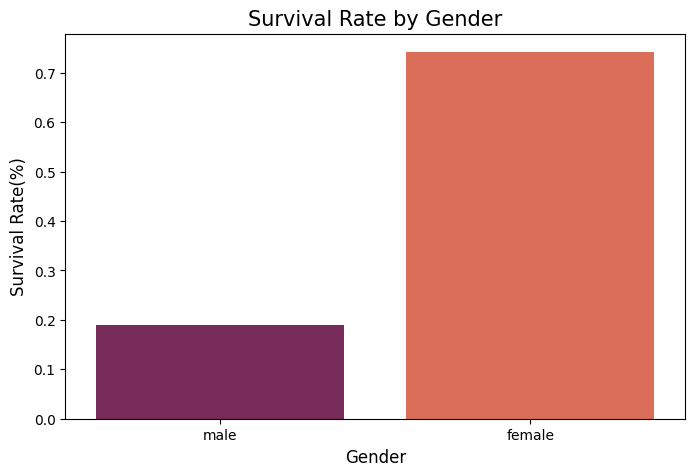

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex',y='Survived', data=train, palette='rocket',ci=None)
plt.title('Survival Rate by Gender', fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Survival Rate(%)',fontsize=12)
plt.show()

## 📝Observations:
- Women had a ~74% survival rate (priority in lifeboats).
- Men had only ~19% survival rate.

## 📝Conclusion:
✔ Gender was the strongest predictor of survival.

## ✨5. Did Family Size Impact Survival? (SibSp + Parch vs. Survived)

<ipython-input-26-7163308440e4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Family_Size',y='Survived',data=train,palette='flare',ci=None)


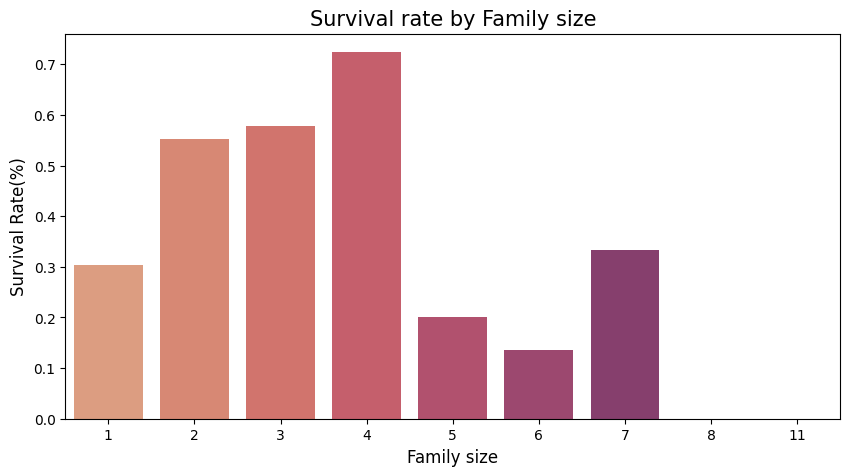

In [26]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
plt.figure(figsize=(10,5))
sns.barplot(x='Family_Size',y='Survived',data=train,palette='flare',ci=None)
plt.title('Survival rate by Family size',fontsize=15)
plt.xlabel('Family size',fontsize=12)
plt.ylabel('Survival Rate(%)',fontsize=12)
plt.show()

## 📝Observations:
- Singles (Family_Size=1) had a low survival rate (~30%).
- Small families (2-4 members) had better survival (~50-70%).
- Large families (>4) had worse survival
---
## Conclusion:
✔ Moderate family sizes (2-4) had an advantage, while singles and very large families struggled.

---
## Key Takeaways from Bivariate Analysis
1. Fare and Pclass are strongly linked (1st class = expensive tickets).

2. Women and children had significantly higher survival rates.

3. Embarked location indirectly affected survival (Cherbourg = wealthier = better survival).

4. Small families (2-4 people) had better survival odds than singles or large groups.


## 🧭Step 4: Multivariate Analysis
- **Multivariate analysis** allows us to examine complex interactions between three or more variables simultaneously. 
- We'll uncover hidden patterns that weren't visible in bivariate analysis.

---
## ✨1. How Do Pclass, Age, and Fare Jointly Affect Survival?

---

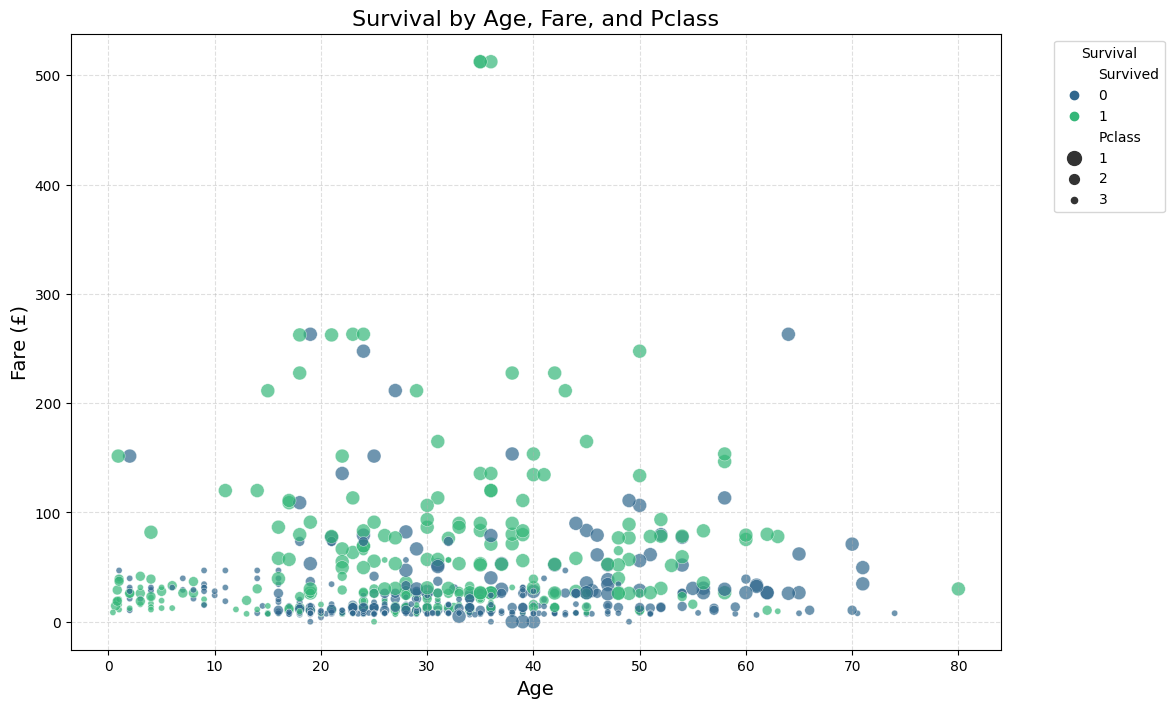

In [27]:
# Create a new feature: Age Group
train['Age_Group'] = pd.cut(train['Age'], 
                             bins=[0, 12, 18, 30, 50, 100],
                             labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Elderly'])

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Pclass',
                sizes={1: 100, 2: 50, 3: 20}, alpha=0.7, palette='viridis', data=train)
plt.title('Survival by Age, Fare, and Pclass', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fare (£)', fontsize=14)
plt.legend(title='Survival', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.4)
plt.show()

## 📝Observations:
- 1st Class (Large Dots):

High fare + young/middle age → High survival

Even elderly 1st-class passengers had better chances

- 3rd Class (Small Dots):

Low fare + adult age → Low survival

Children in 3rd class still had decent survival rates

- Fare Matters Within Classes:

Higher-paying passengers in each class survived more

## 📝Conclusion:
✔ Wealth (Pclass + Fare) + Age created survival hierarchies
1st-class children had near-perfect survival, while 3rd-class adults perished most


## ✨2. Survival Rates by Age Group, Sex, and Pclass

---

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
<ipython-input-28-ef9db3620980>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Age_Group', y='Survived', hue='Sex', col='Pclass',
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is de

<Figure size 1400x800 with 0 Axes>

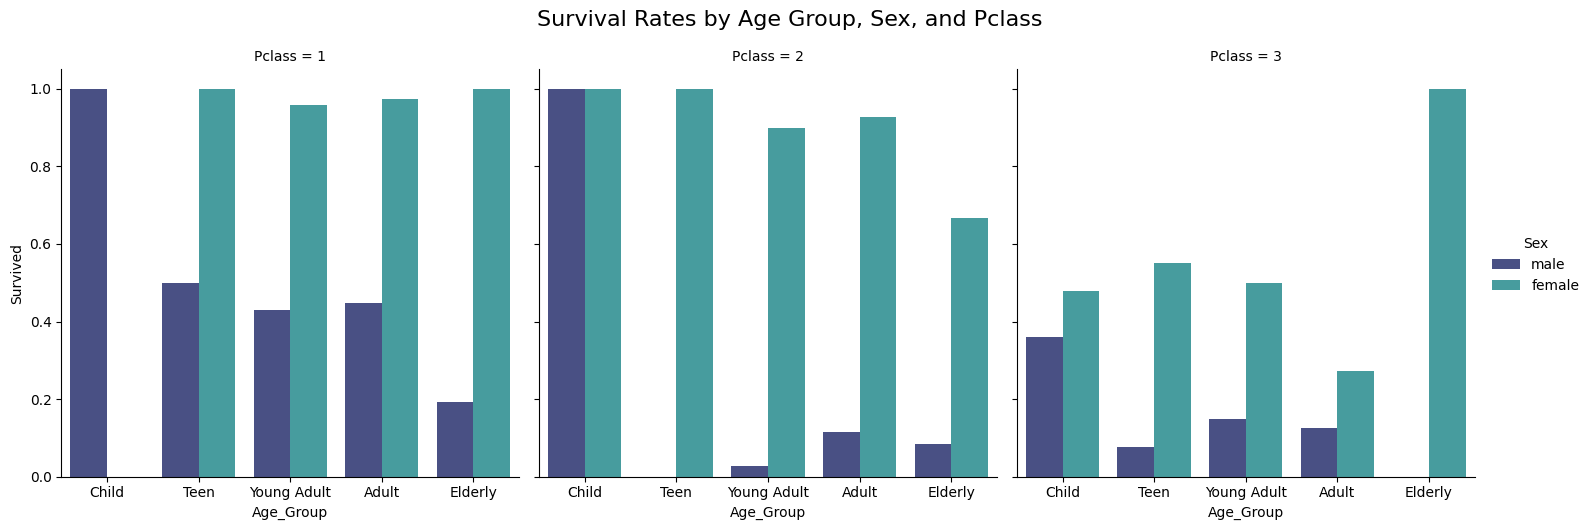

In [28]:
plt.figure(figsize=(14, 8))
sns.catplot(x='Age_Group', y='Survived', hue='Sex', col='Pclass',
            kind='bar', data=train, palette='mako', ci=None)
plt.suptitle('Survival Rates by Age Group, Sex, and Pclass', y=1.05, fontsize=16)
plt.show()

## 📝Observations:
- 1st Class Females:

Nearly 100% survival across all age groups

- 3rd Class Males:

<20% survival (worst odds)

Even boys (Child/Teen) had lower survival than 1st-class elderly

- Class Trumps Age for Women:

3rd-class women survived more than 1st-class men

## 📝Conclusion:
✔ Gender > Class > Age in survival hierarchy
✔ Poor men had the worst outcomes, rich women the best

## ✨3. Embarked, Pclass, and Fare Interactions

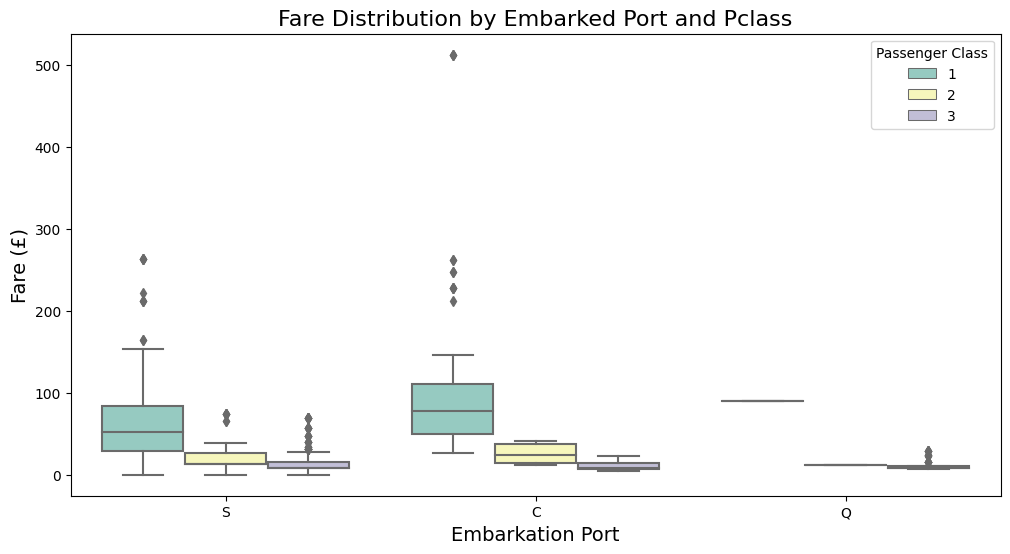

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train, palette='Set3')
plt.title('Fare Distribution by Embarked Port and Pclass', fontsize=16)
plt.xlabel('Embarkation Port', fontsize=14)
plt.ylabel('Fare (£)', fontsize=14)
plt.legend(title='Passenger Class')
plt.show()

## 📝Observations:
- Cherbourg (C):

More high-fare 1st-class passengers → Explains its high survival rate

- Queenstown (Q):

Almost no 1st-class passengers → Lower survival rates

- Southampton (S):

Mostly 3rd-class passengers → Poorest survival

## 📝 Conclusion:
✔ Embarked port's effect on survival was mediated by passenger class mix



## ✨4. Family Size, Pclass, and Survival Interaction

<ipython-input-30-499c493d1beb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Family_Size_Cat', y='Survived', hue='Pclass',
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


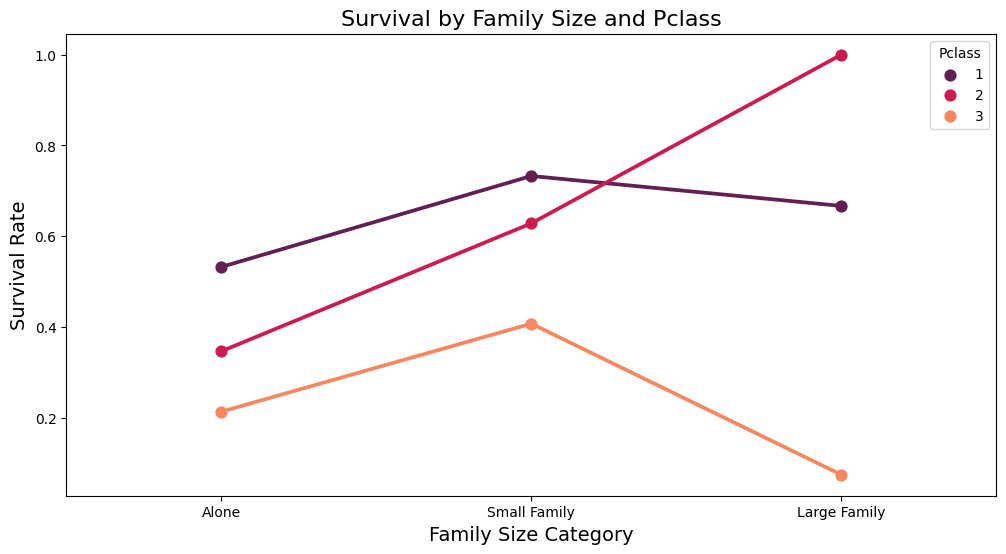

In [30]:
# Create family size categories
train['Family_Size_Cat'] = pd.cut(train['Family_Size'],
                                   bins=[0, 1, 4, 11],
                                   labels=['Alone', 'Small Family', 'Large Family'])

# Plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Family_Size_Cat', y='Survived', hue='Pclass',
              data=train, palette='rocket', ci=None)
plt.title('Survival by Family Size and Pclass', fontsize=16)
plt.xlabel('Family Size Category', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.show()

## 📝Observations:
- 1st-Class Small Families:

Best survival (~75%) 

✅ 3rd-Class Large Families:

Worst survival (~15%) 

✅ Alone Passengers:

1st-class singles did better than 3rd-class families

## 📝Conclusion:
✔ Family size helped only if coupled with wealth (Pclass)

---

## Key Multivariate Insights
1. Survival was determined by a hierarchy: Sex > Class > Age > Family Size

2. Wealth (Pclass + Fare) could override age disadvantages

3. Embarked port effects were actually class effects in disguise

4. Small families survived best only in higher classes

## 🧭Step 5: Outlier Detection and Handling in Titanic Dataset

Outliers can significantly impact analysis and modeling. Below, I examine key features with outliers, justify handling methods, and implement solutions.

---

## 1.Fare Outlier
- **Detection**

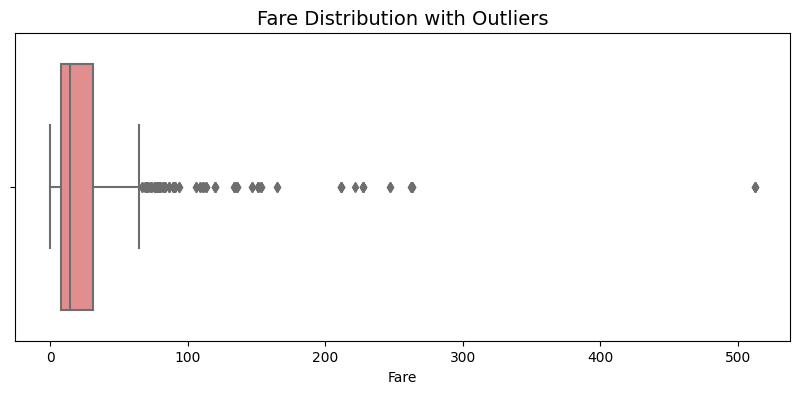

In [31]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=train['Fare'], color='lightcoral')
plt.title('Fare Distribution with Outliers', fontsize=14)
plt.show()

## Observations:
- Extreme right-skewed distribution

- 75th percentile: £31

- Maximum: £512 (vs 99th percentile: £112)

## Handling Decision:
✔ Method: Capping at 95th percentile (£77)
Justification:

- Preserves wealth information while reducing skew

- High fares reflect real 1st-class luxury (should not be removed)

- Capping avoids distorting statistical models



In [32]:
fare_cap = train['Fare'].quantile(0.95)
train['Fare_Adjusted'] = train['Fare'].clip(upper=fare_cap)

## 2.Age Outliers
- **Detection**

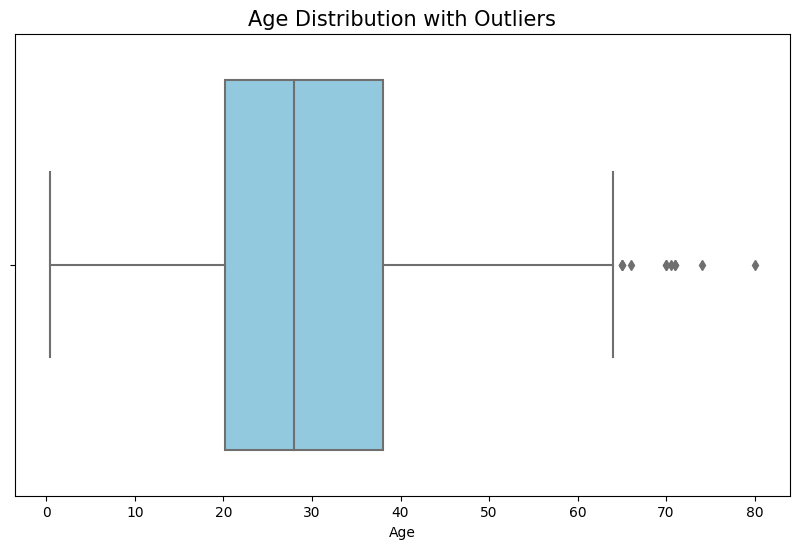

In [33]:
plt.figure(figsize = (10,6))
sns.boxplot(x=train['Age'].dropna(), color = 'skyblue')
plt.title('Age Distribution with Outliers', fontsize=15)
plt.show()

## Observation
- Valid biological range (0.42 to 80 years)

- No extreme outliers, just natural distribution

## Handling Decision:
✔ Method: **Keep as-is
Justification:**

- "Outliers" represent real demographic groups (babies, elderly)

- Critical for survival analysis ("women and children first")

- Imputing/removing would erase meaningful patterns

## 3.Family Size Outliers
**Detection:**


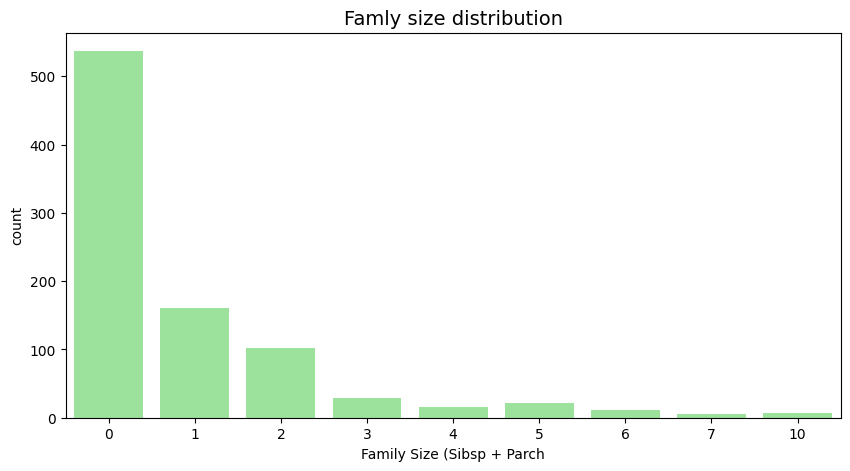

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['SibSp'] + train['Parch'],color='lightgreen')
plt.title('Famly size distribution',fontsize = 14)
plt.xlabel('Family Size (Sibsp + Parch')
plt.show()

## Observations:
- Most passengers have 0-3 family members

- Few extreme cases (up to 10 relatives)

## Handling Decision:
✔ Method: Categorization
Justification:

Large families are rare but historically valid

Convert to ordinal categories:

0: Alone

1-3: Small family

4+: Large family

---

## Implimentation

In [35]:
train['Family_Size_Cat'] = pd.cut(
    train['SibSp'] + train['Parch'] + 1,
    bins=[0,1,4,11], labels = ['Alone','Small Family','Large Family']
)

## 4. Cabin Outliers (Missing Data as Outliers)
**Detection:**

In [36]:
missing_cabin = train['Cabin'].isnull().mean() * 100
print(f"Missing Cabin Data: {missing_cabin:.1f}%")

Missing Cabin Data: 77.1%


## Observations:
- 77% missing values

- Non-missing cabins mostly 1st-class

## Handling Decision:
✔ Method: Binary Flag + Keep NAs
Justification:

- Cabin location strongly correlates with class/survival

- Missingness itself is informative (likely lower-class)

---
## Implementation:


In [37]:
train['Has_Cabin'] = train['Cabin'].notnull().astype(int)

## Impact Assessment
**Before vs. After Fare Capping:**


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


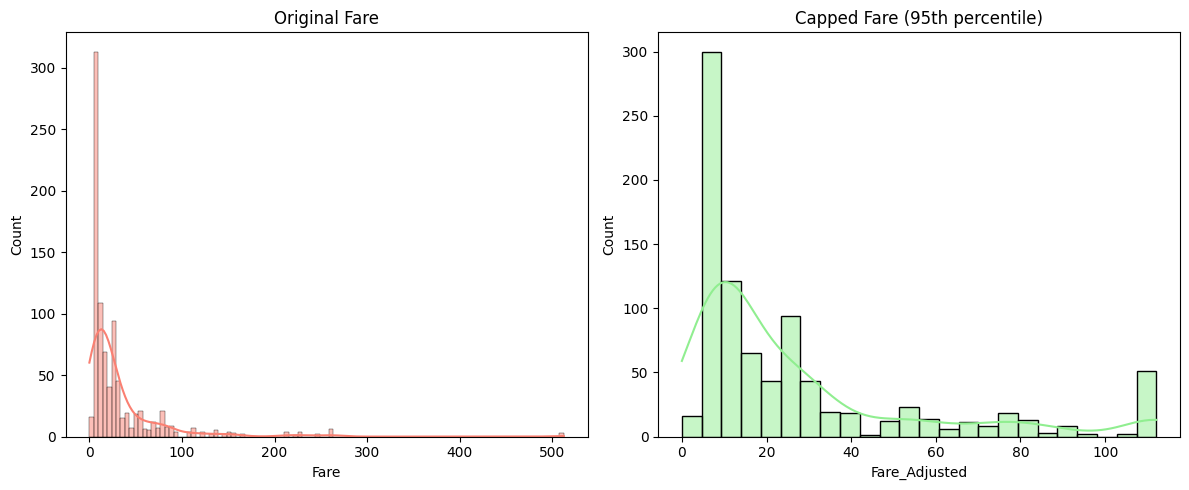

In [38]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train['Fare'], kde=True, color='salmon')
plt.title('Original Fare')

plt.subplot(1, 2, 2)
sns.histplot(train['Fare_Adjusted'], kde=True, color='lightgreen')
plt.title('Capped Fare (95th percentile)')
plt.tight_layout()
plt.show()

## 🧭Step 6: Target Variable Exploration: Survival Analysis on the Titanic Dataset
- We'll conduct a comprehensive analysis of the Survived variable (1 = survived, 0 = died) to understand its distribution, dataset balance, and key influencing factors.

## 1. Distribution of the Target Variable
- Count Plot of Survival Status
  

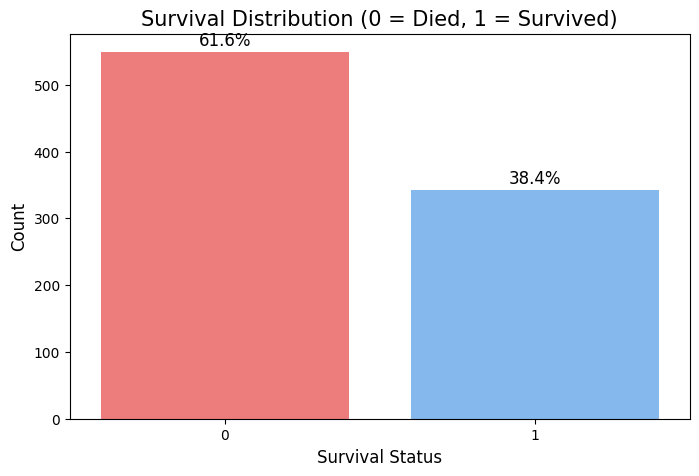

In [39]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Survived', data=train, palette=['#ff6b6b','#74b9ff'])
plt.title('Survival Distribution (0 = Died, 1 = Survived)', fontsize=15)
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentage labels
total = len(train)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()+10), 
                ha='center', fontsize=12)
plt.show()

## Key Observations:

- Imbalanced dataset: Only 38.4% survived (342 passengers) vs. 61.6% died (549)

## 2. Key Factors Influencing Survival
- A. Gender vs. Survival ("Women and Children First")

<ipython-input-40-c89142127875>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train, palette='viridis', ci=None)


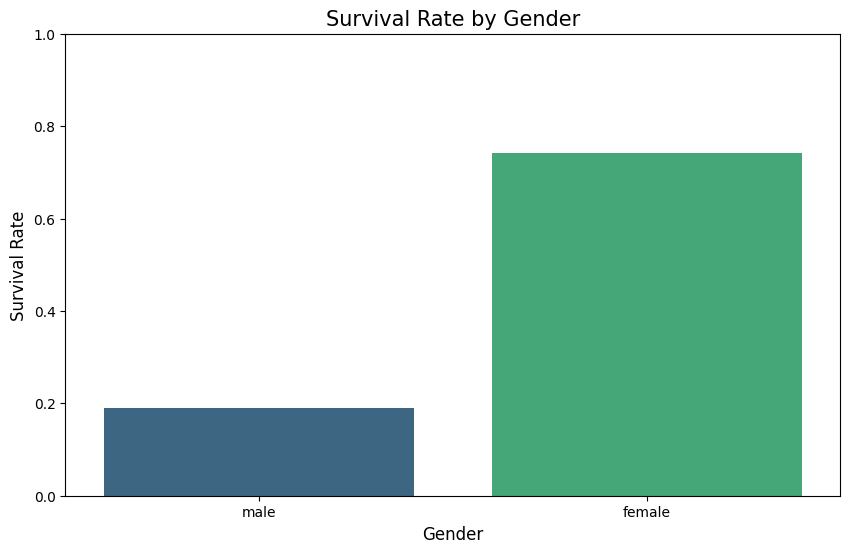

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train, palette='viridis', ci=None)
plt.title('Survival Rate by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
plt.show()

## Findings:

- Females: 74.2% survival rate

- Males: Only 18.9% survival

- Gender was the strongest predictor of survival



## 3. Interaction Effects (Combined Plots)
- A. Gender × Class Interaction

<ipython-input-41-bba512427ce7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, palette='rocket', ci=None)


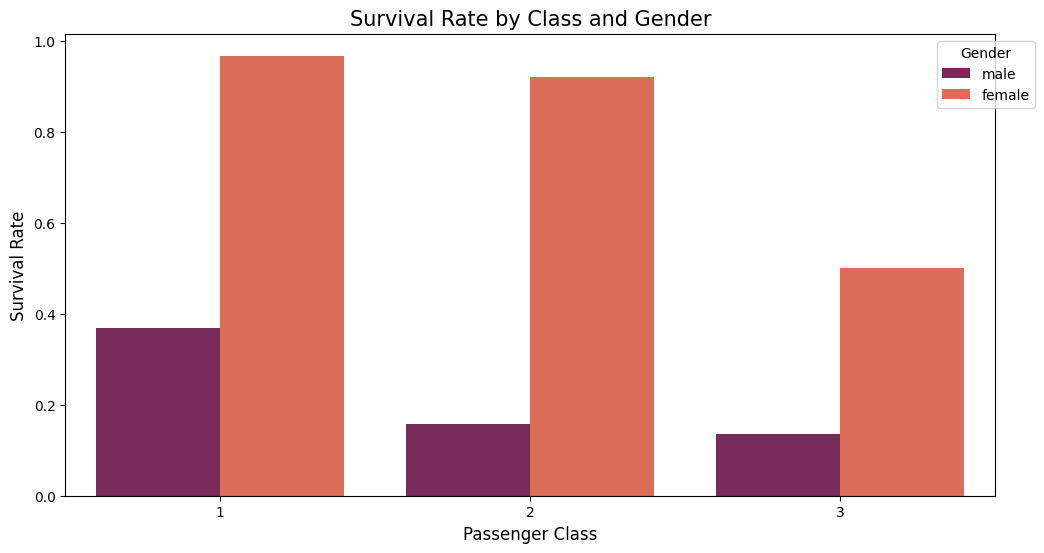

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, palette='rocket', ci=None)
plt.title('Survival Rate by Class and Gender', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1))
plt.show()

## B. Age × Class × Survival (Violin Plot)

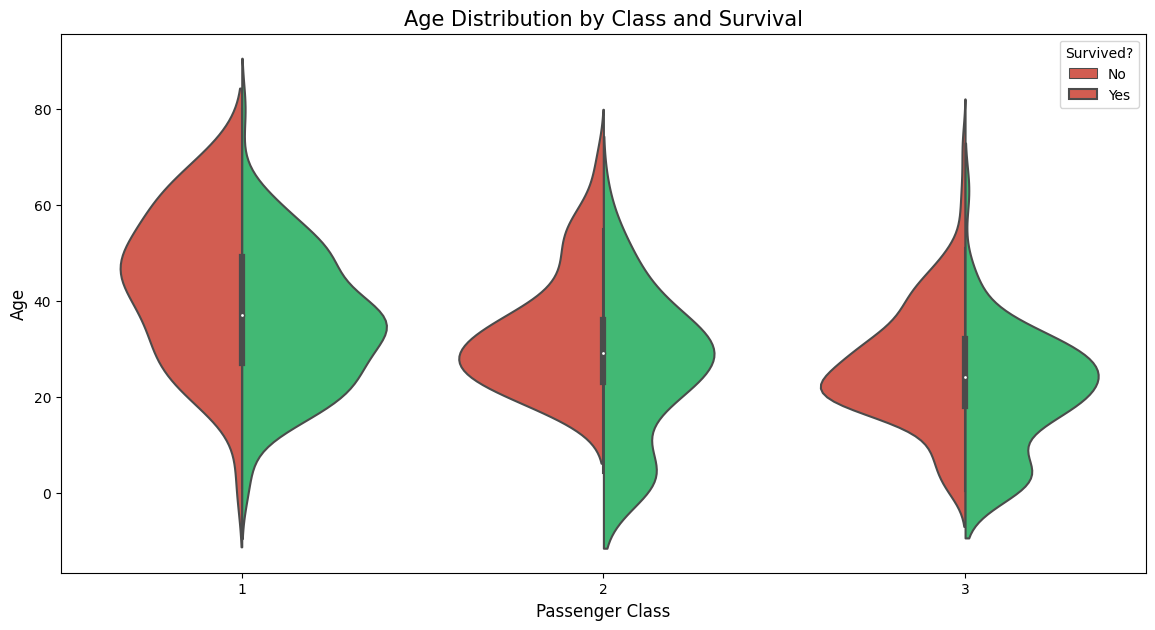

In [42]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, 
               split=True, palette={0: '#e74c3c', 1: '#2ecc71'})
plt.title('Age Distribution by Class and Survival', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Survived?', labels=['No', 'Yes'])
plt.show()

## C. Embarkation Port × Class × Survival

<ipython-input-43-0b065f6a5617>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Embarked', y='Survived', hue='Pclass', kind='bar',


<Figure size 1400x600 with 0 Axes>

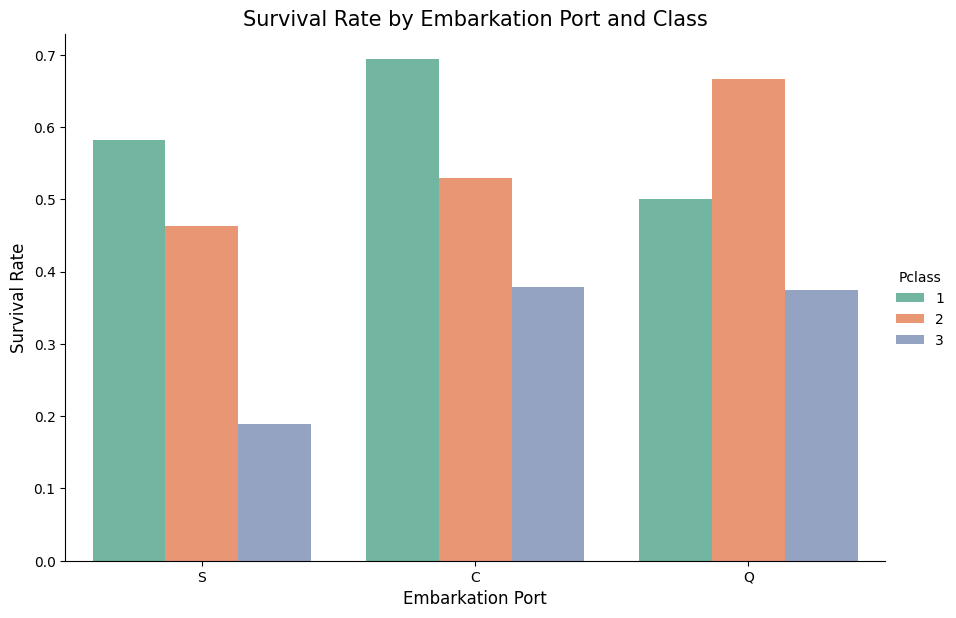

In [43]:
plt.figure(figsize=(14, 6))
sns.catplot(x='Embarked', y='Survived', hue='Pclass', kind='bar', 
            data=train, palette='Set2', ci=None, height=6, aspect=1.5)
plt.title('Survival Rate by Embarkation Port and Class', fontsize=15)
plt.xlabel('Embarkation Port', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

## 4. Most Predictive Features (Correlation Heatmap

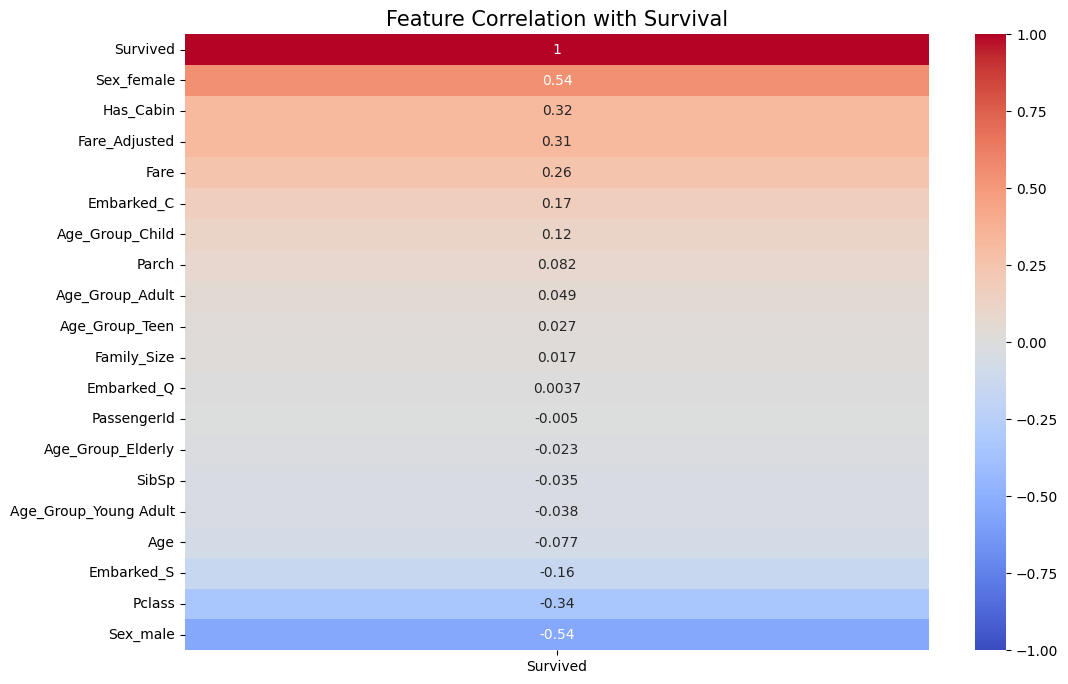

In [44]:
# Encode categorical variables
df_encoded = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Age_Group'])

plt.figure(figsize=(12, 8))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr[['Survived']].sort_values('Survived', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Survival', fontsize=15)
plt.show()

## Top Correlations:

- Sex_female: +0.54

- Pclass: -0.34 (negative because lower class = worse survival)

- Fare: +0.26

- Has_Cabin: +0.20